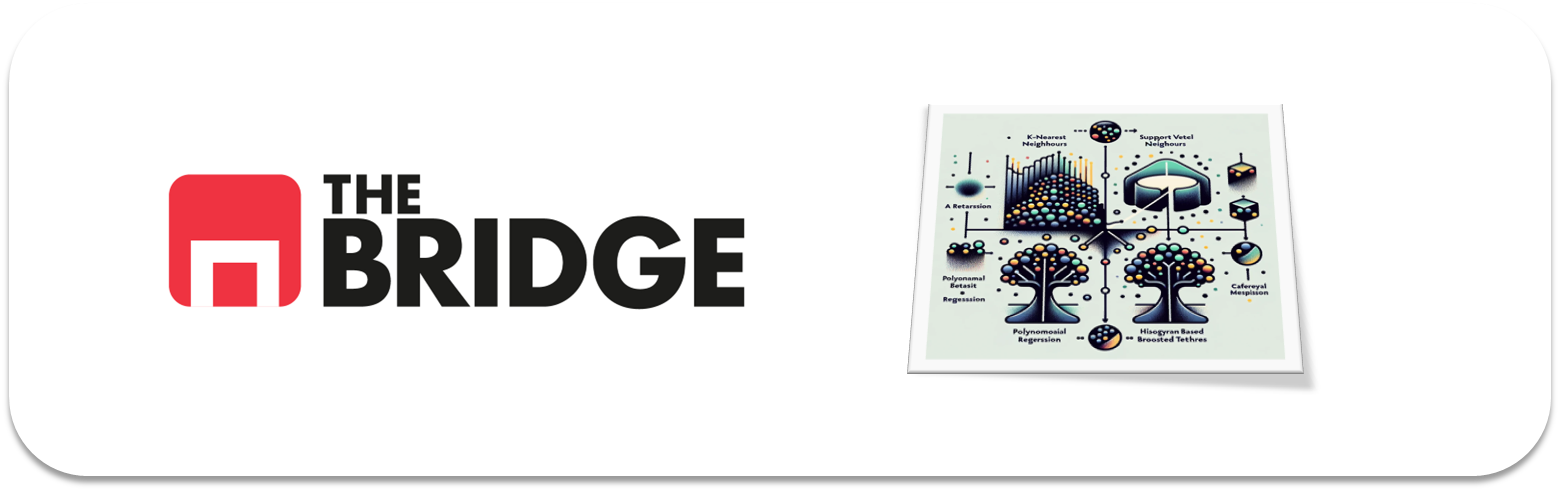

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
credit = pd.read_csv('data/credit_npo.csv')
credit

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
credit.dropna(subset=['MonthlyIncome', 'NumberOfDependents'], inplace=True)

In [5]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,11816.0,0.070244,0.255568,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,11816.0,0.335668,0.365209,0.0,0.034927,0.179183,0.587187,6.0
age,11816.0,51.447698,14.516270,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,11816.0,0.340471,2.927409,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,11816.0,0.499708,2.696067,0.0,0.143456,0.294748,0.477414,96.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,11816.0,8.759140,5.129772,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,11816.0,0.180010,2.892577,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,11816.0,1.059580,1.140716,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,11816.0,0.149712,2.868248,0.0,0.000000,0.000000,0.000000,98.0


In [6]:
categorical = [col for col in credit.columns if credit[col].dtype == 'object']
numerical = [col for col in credit.columns if credit[col].dtype in ['int64', 'float64']]

print("Variables Categóricas:", categorical)
print("Variables Numéricas:", numerical)

Variables Categóricas: []
Variables Numéricas: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


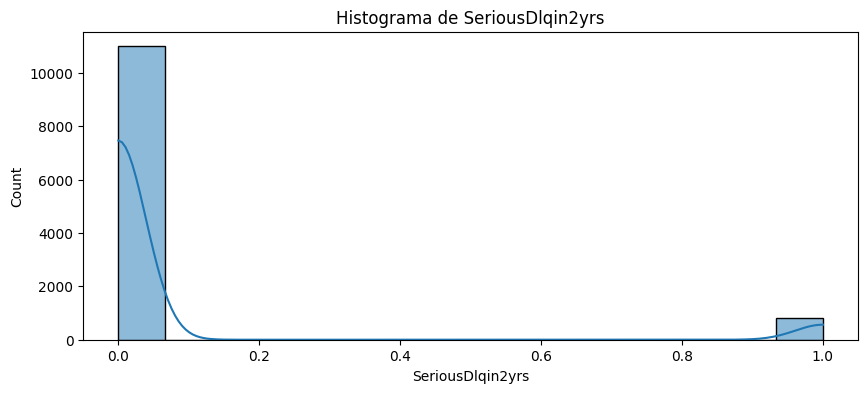

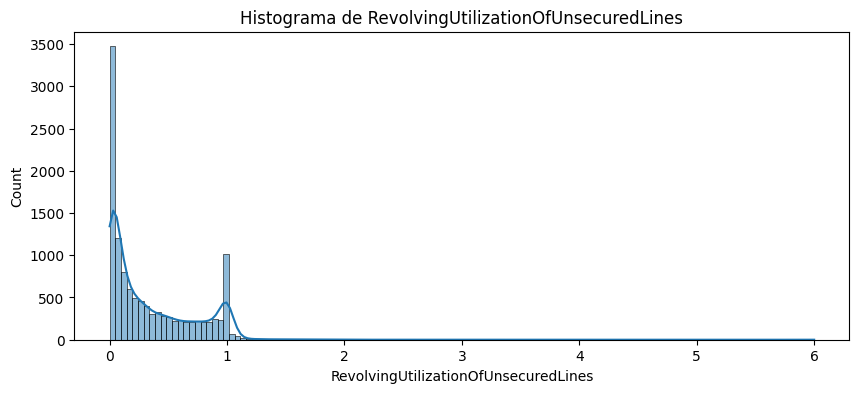

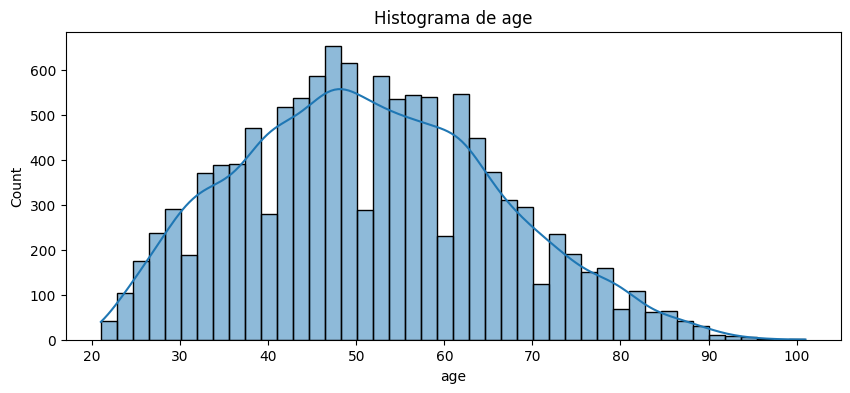

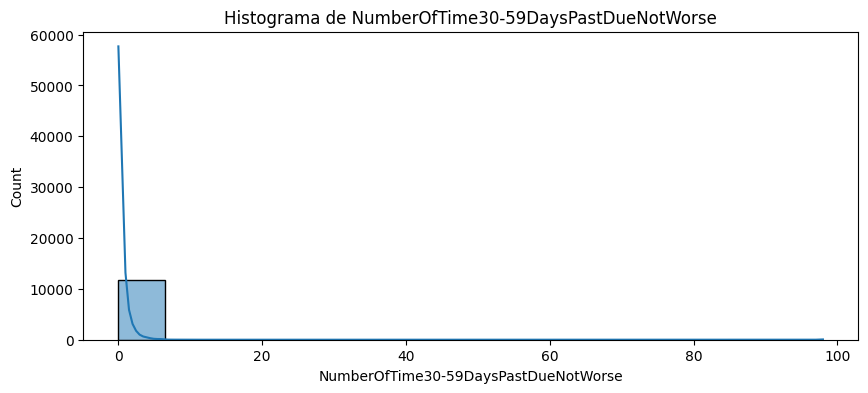

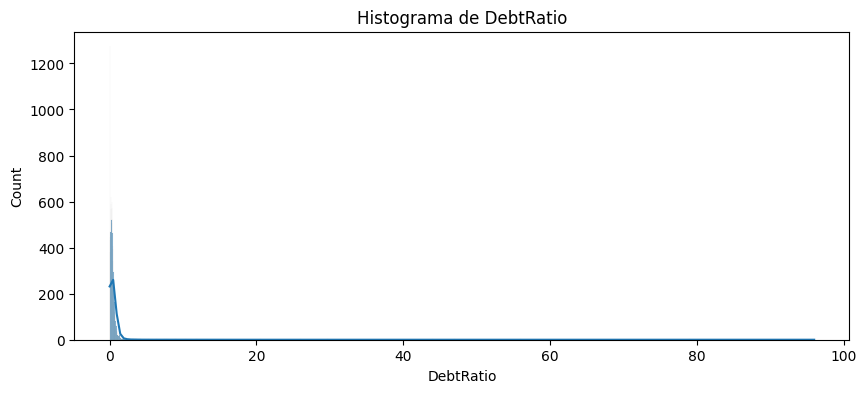

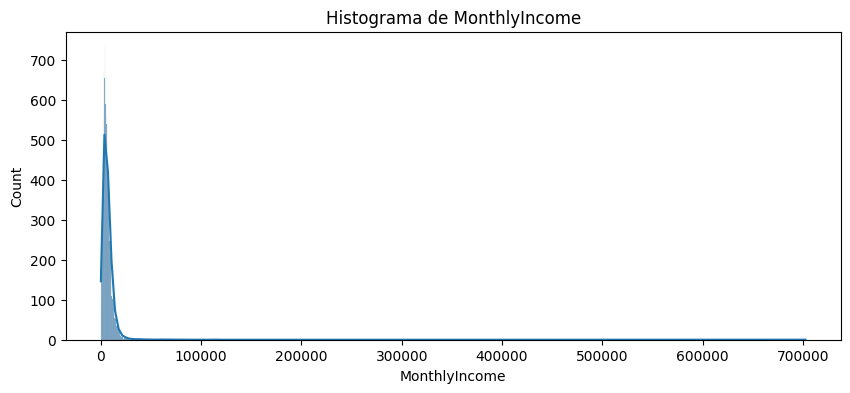

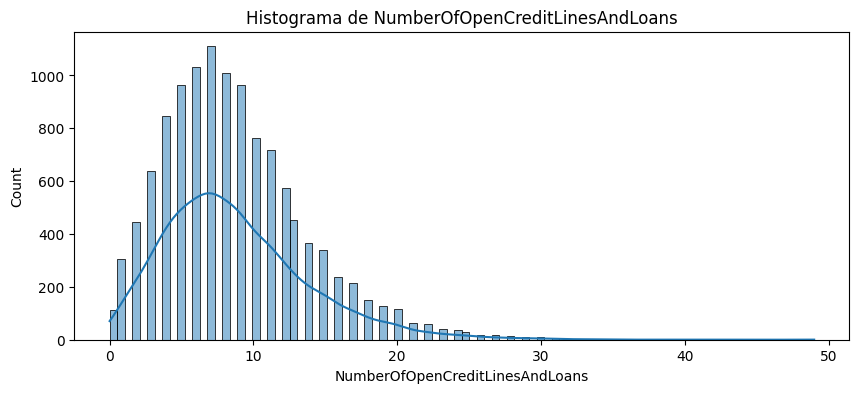

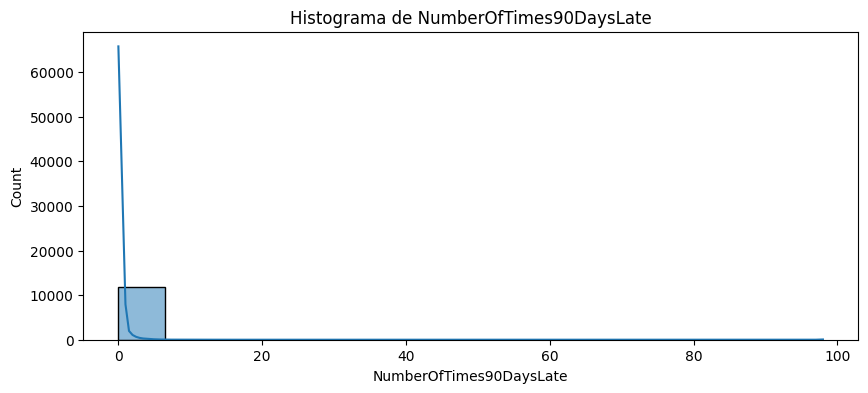

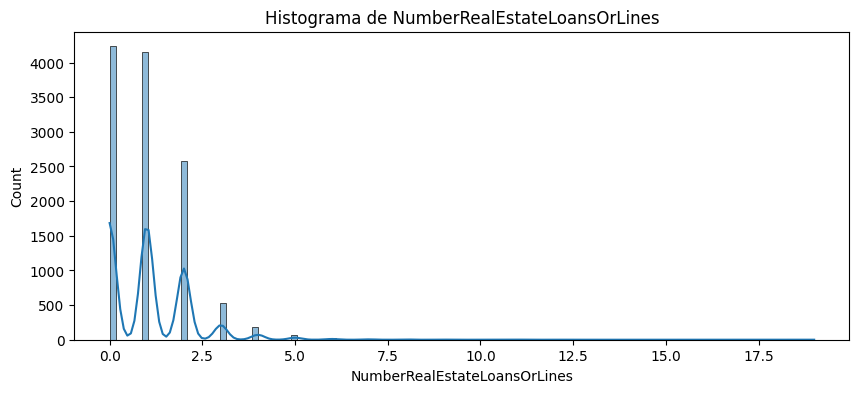

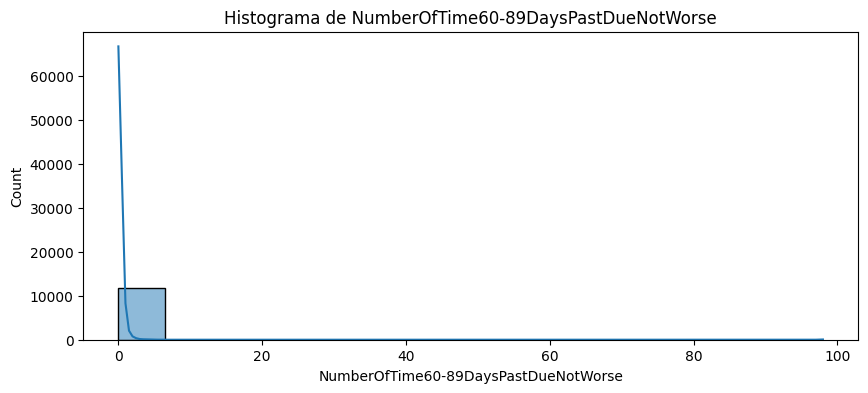

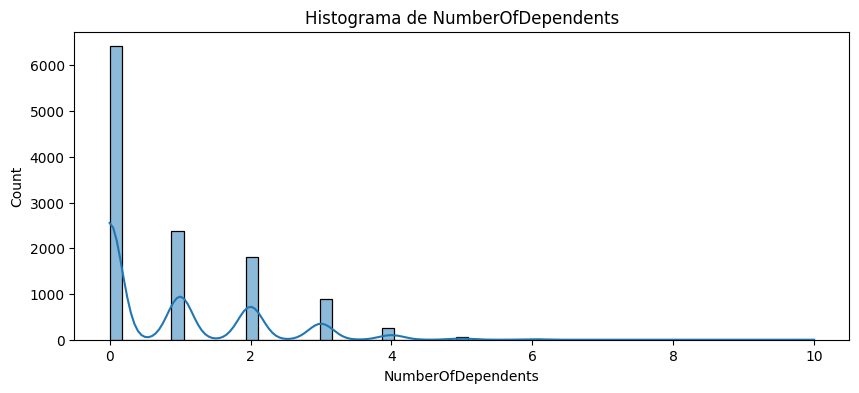

In [7]:
for col in numerical:
    plt.figure(figsize=(10, 4))
    sns.histplot(credit[col], kde=True)
    plt.title('Histograma de ' + col)
    plt.show()

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

In [8]:
target = 'SeriousDlqin2yrs'

Estamos ante un problema de clasificación binaria. El objetivo es predecir un target (SeriousDlqin2yrs) que tiene dos posibles valores. En este contexto, el objetivo es predecir si una persona va a encontrarse en dificultades financieras en los próximos dos años. En otras palabras, queremos que no se nos pase ningun falso positivo.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

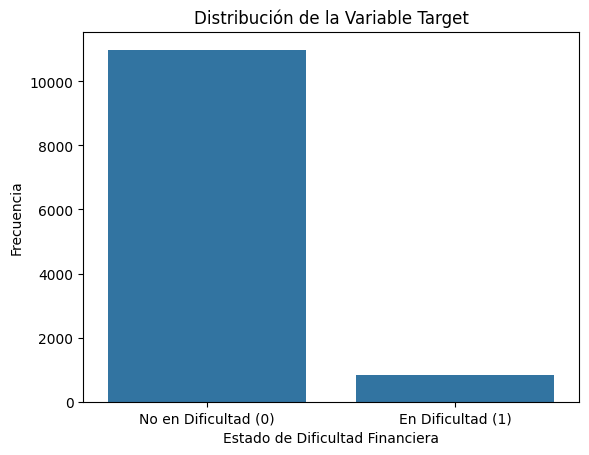

In [9]:
sns.countplot(x=target, data=credit)
plt.title('Distribución de la Variable Target')
plt.xlabel('Estado de Dificultad Financiera')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No en Dificultad (0)', 'En Dificultad (1)'])
plt.show()


La mayoría de los individuos no están en dificultades financieras (0), y solo una pequeña proporción están en dificultades (1), entonces el conjunto de datos está desbalanceado. Voy a recurrir a aplicar SMOTE (Synthetic Minority Over-sampling Technique) en la clase minoritaria, es una técnica de sobremuestreo que ayuda a abordar el problema del desbalance de clases al crear ejemplos sintéticos (no duplicados) de la clase minoritaria.

In [10]:
train_set, test_set = train_test_split(credit, test_size= 0.2, random_state= 42)
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [11]:
smote = SMOTE(random_state=42)
X, y = credit.drop(target, axis=1), credit[target]
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribución de clases después de SMOTE:", y_resampled.value_counts())

Distribución de clases después de SMOTE: SeriousDlqin2yrs
0    10986
1    10986
Name: count, dtype: int64


In [12]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [13]:
# Asumiendo que 'X' son las características y 'y' es la variable target
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring='recall')
    print(f"{name} Recall: {scores.mean():.2f} +/- {scores.std():.2f}")

KNN Recall: 0.02 +/- 0.02
Logistic Regression Recall: 0.17 +/- 0.06
Random Forest Recall: 0.18 +/- 0.03


Vemos los resultados que habriamos obtenido de no haber realizado el sobremuestreo.

In [14]:
# Asumiendo que 'X' son las características y 'y' es la variable target
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_test_smote, y_test_smote, cv=5, scoring='recall')
    print(f"{name} Recall: {scores.mean():.2f} +/- {scores.std():.2f}")

KNN Recall: 0.79 +/- 0.03
Logistic Regression Recall: 0.76 +/- 0.02
Random Forest Recall: 0.87 +/- 0.01


Comparamos los resultados habiendo realizado el sobremuestreo (SMOTE) obtenemos unos resultados bastante buenos, vemos que random forest obtiene una recall superior a KNN, recordamos que lo que nos interesa que no se cuele son todos los falsos positivos.

In [15]:
# Suponiendo que Random Forest fue el mejor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='recall')
grid_search.fit(X, y)
print(f"Mejor Recall: {grid_search.best_score_:.2f}")
print("Mejores parámetros:", grid_search.best_params_)

Mejor Recall: 0.21
Mejores parámetros: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}


In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

best_model


RandomForestClassifier(max_depth=30, min_samples_split=5)

In [17]:
accuracy_score(y_test, y_pred)

0.9780033840947546

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2197
           1       1.00      0.69      0.82       167

    accuracy                           0.98      2364
   macro avg       0.99      0.84      0.90      2364
weighted avg       0.98      0.98      0.98      2364



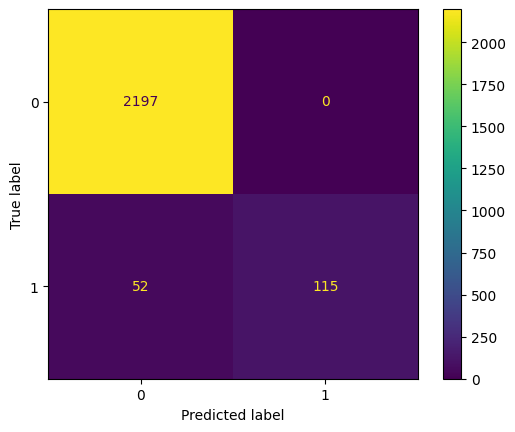

In [18]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Viendo la matriz de confusión me doy cuenta de que el modelo atrapa los positivos falsos, no es lo que buscamos para este caso, ya que lo que nos interesa es que no nos pase nadie que vaya a tener problemas financieros y la maquina prediga que no.

Voy a optimizar los hiperparametros para KNN y veremos que resultados da.

In [19]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [10,20, 30, 40, 50],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance'] 
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train_smote, y_train_smote) 

print("Mejor Recall:", grid_search.best_score_)
print("Mejores Parámetros:", grid_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejor Recall: 0.9218209097515805
Mejores Parámetros: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [20]:
best_knn = grid_search.best_estimator_
best_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [21]:
score = cross_val_score(best_knn, X_resampled, y_resampled, cv=5, scoring='recall')
print(f"Recall: {score.mean():.2f} +/- {score.std():.2f}")

Recall: 0.94 +/- 0.01


In [22]:
y_pred = best_knn.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.9263959390862944

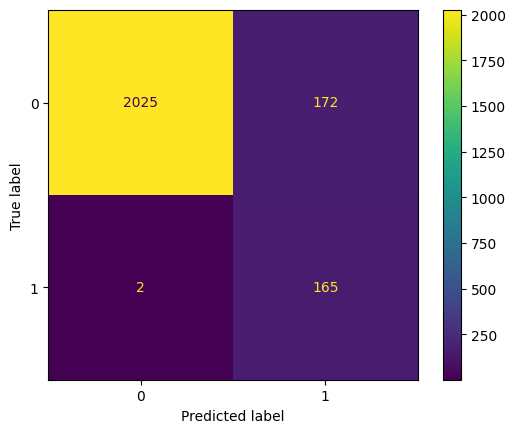

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2197
           1       0.49      0.99      0.65       167

    accuracy                           0.93      2364
   macro avg       0.74      0.95      0.81      2364
weighted avg       0.96      0.93      0.94      2364



El resultado es casi perfecto, en base a lo que buscamos, que es el recall de todos los falsos positivos.